In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
salaries = pd.read_csv('https://richardson.byu.edu/220/ds_salary.csv')
frequency_distribution = salaries["salary"].value_counts().sort_index()

#Section 1

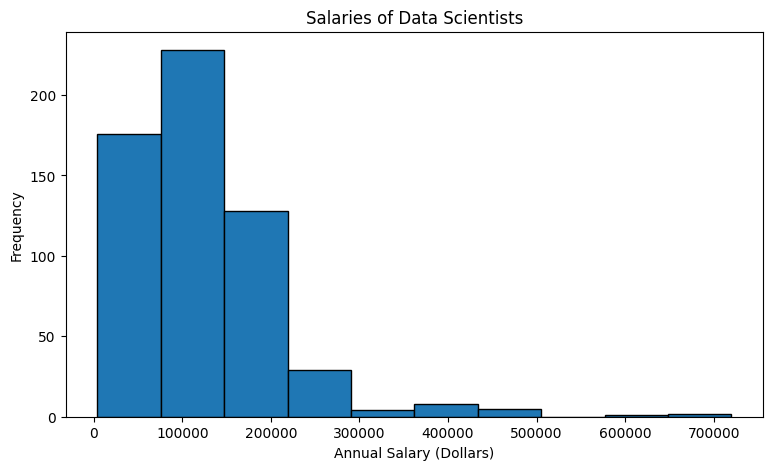

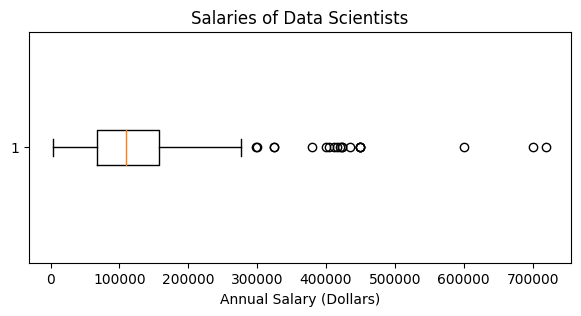



Min: $4000, Median: $110000.0, Max: $720000


'Looking at the data from a very basic analysis we can see that the average salary is clustered around $100000.\n\nThe data is also heavily skewed to the right as the tail leads up towards $700000.\n\n'

In [3]:
# Section 1: General Salary Data
plt.figure(figsize=(9, 5))
plt.hist(salaries["salary"], bins=10, edgecolor='black')
plt.title(f'Salaries of Data Scientists')
plt.xlabel("Annual Salary (Dollars)")
plt.ylabel('Frequency')
plt.show()



#Box Plot
plt.figure(figsize=(7, 3))
plt.boxplot(salaries["salary"], vert=False)
plt.title(f'Salaries of Data Scientists')
plt.xlabel("Annual Salary (Dollars)")
plt.show()

print("\n")
minimum = np.min(salaries["salary"])
median = np.median(salaries["salary"])
maximum = np.max(salaries["salary"])
print(f"Min: ${minimum}, Median: ${median}, Max: ${maximum}")

"""Looking at the data from a very basic analysis we can see that the average salary is clustered around $100000.

The data is also heavily skewed to the right as the tail leads up towards $700000.

"""

#Section 2

<Figure size 700x400 with 0 Axes>

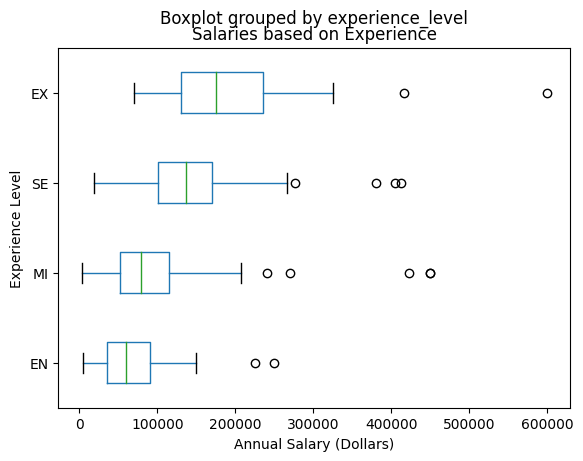

Experience Level: EN, Mean Salary: $65,249.81
Experience Level: MI, Mean Salary: $91,077.53
Experience Level: SE, Mean Salary: $140,119.66
Experience Level: EX, Mean Salary: $204,206.16


In [4]:
# Section 2: Effect of Experience on Salary

experience_order = ['EN', 'MI', 'SE', 'EX']

# Convert the experience_level column to categorical with the specified order
salaries['experience_level'] = pd.Categorical(salaries['experience_level'], categories=experience_order, ordered=True)

plt.figure(figsize=(7, 4))
salaries.boxplot(column="salary_in_usd", by='experience_level', vert=False, grid=False)
plt.title('Salaries based on Experience')
plt.xlabel("Annual Salary (Dollars)")
plt.ylabel('Experience Level')
plt.show()

mean_salaries = salaries.groupby('experience_level', observed=True)['salary_in_usd'].apply(np.mean)
for level, mean_salary in mean_salaries.items():
    print(f'Experience Level: {level}, Mean Salary: ${mean_salary:,.2f}')


Based on the boxplot, we can see a trend that as a person has more experience the higher their - on average -  salary will be. The means of each experience group reflect this trend, with a EX experience level salary being more than double the entry level salary. There are outliers in each group that lean towards the high end of the salary spectrum.

#Section 3

<Figure size 700x400 with 0 Axes>

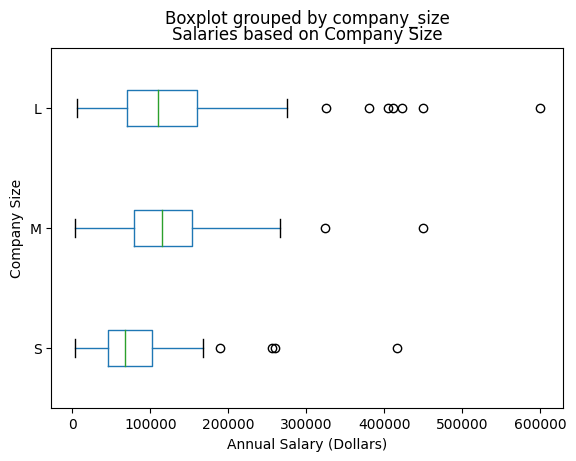

Company Size: S, Median Salary: $67,881.50
Company Size: M, Median Salary: $115,000.00
Company Size: L, Median Salary: $109,500.00


In [5]:
# Section 3: Impact of Company Size on Salary

size_order = ['S', 'M', "L"]

# Convert the experience_level column to categorical with the specified order
salaries['company_size'] = pd.Categorical(salaries['company_size'], categories=size_order, ordered=True)

plt.figure(figsize=(7, 4))
salaries.boxplot(column="salary_in_usd", by='company_size', vert=False, grid=False)
plt.title('Salaries based on Company Size')
plt.xlabel("Annual Salary (Dollars)")
plt.ylabel('Company Size')
plt.show()

median_salaries = salaries.groupby('company_size', observed=True)['salary_in_usd'].apply(np.median)
for level, median_salary in median_salaries.items():
    print(f'Company Size: {level}, Median Salary: ${median_salary:,.2f}')

The quartile range for both Medium and Large sized companies looks very similar. In fact, the median salary for Medium sized companies is actually larger than that of Large sized companies. The Small sized company has a smaller range, and a lower median salary.  Overall I think once your company is past medium size, salary is not ultimately impacted, but smaller companies do tend to have smaller salaries on average.

#Section 4

Salary Stats for jobs containing word 'Engineer':

                           mean    median  count
experience_level                                
EN                 68351.964286   61517.5     28
MI                 83052.493506   78526.0     77
SE                137730.233645  140250.0    107
EX                232224.444444  200000.0      9


Salary Stats for jobs containing word 'Scientist':

                           mean    median  count
experience_level                                
EN                 66276.689655   52396.0     29
MI                100678.270270   89327.0     74
SE                154775.012658  144000.0     79
EX                416000.000000  416000.0      1


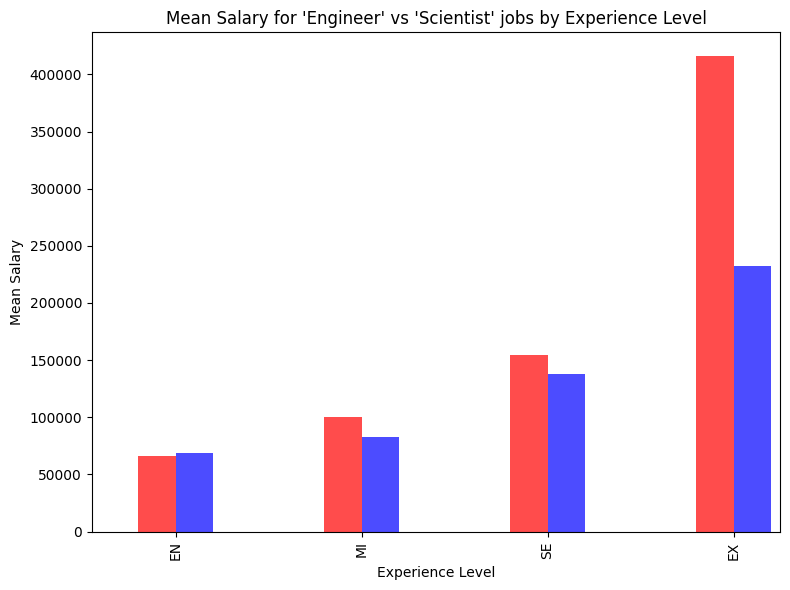

In [6]:
# Section 4: Job Title Analysis

engineer_jobs = salaries[salaries['job_title'].str.contains('engineer', case=False, na=False)]
scientist_jobs = salaries[salaries['job_title'].str.contains('scientist', case=False, na=False)]

salary_stats = engineer_jobs.groupby('experience_level', observed=True)['salary_in_usd'].agg(['mean', 'median', 'count'])
scientist_salary_stats = scientist_jobs.groupby('experience_level', observed=True)['salary_in_usd'].agg(['mean', 'median', 'count'])

print("Salary Stats for jobs containing word 'Engineer':\n")
print(salary_stats)
print("\n")
print("Salary Stats for jobs containing word 'Scientist':\n")
print(scientist_salary_stats)

fig, ax = plt.subplots(figsize=(8, 6))

salary_stats['mean'].plot(kind='bar', color='blue', alpha=0.7, ax=ax, position=0, width=.2, label="Engineer")
scientist_salary_stats['mean'].plot(kind='bar', color='red', alpha=0.7, position=1, width=0.2, ax=ax, label='Scientist')


ax.set_title("Mean Salary for 'Engineer' vs 'Scientist' jobs by Experience Level")
ax.set_xlabel('Experience Level')
ax.set_ylabel('Mean Salary')

plt.tight_layout()
plt.show()

For all cases except entry level, jobs that contain the word "Scientist" tend to have a higher mean salary than jobs that contain the word "Engineer". However, there are more jobs available in the Senior or Executive experience level that contain the word "Engineer" rather than "Scientist". And there are more Engineer jobs in total.

#Section 5

In [7]:
# Section 5: Interactions Between Relationships (The 3 Factors)

# I'll start by loading in the data
df = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")

# Creatimg the binary variables for analyst titles
df['is_analyst'] = df['job_title'].str.contains('Analyst', case=False)

# Func creates the two way table of mean salaries
table = pd.pivot_table(df, values='salary_in_usd',
                       index='company_size',
                       columns='is_analyst',
                       aggfunc=np.mean)

# Formating for the table
table = table.round(0).astype(int)
table.columns = ['Other Titles', 'Analyst Titles']
table.index.name = 'Company Size'

print(table)


'''The pivot table shows that people who have "non-Analyst" roles consistently earn higher salaries than Analyst roles no matter what the company size.
Additionally, larger companies offer higher salaries overall, however, the previously mentioned higher earning non-Analyst roles are still true.
This suggests that job title and company size both impact data scientist salaries.'''

              Other Titles  Analyst Titles
Company Size                              
L                   129979          101670
M                   124203          100423
S                    86128           45112


<ipython-input-7-fca4609bf446>:10: FutureWarning: The provided callable <function mean at 0x7f21814e7d00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='salary_in_usd',


#Section 6

In [8]:
# Section 6: Conclusion

# 6. Conclusion

'''After coming to an understanding of the data scientist salary dataset, some interesting relationships start to become aparent.

1. Salaries for data scientists were generally right skewed with most salaries grouping around $100,000 to $150,000. Some extended much higher.

2. Level of experience has an obvious impact on salary. Entry positions pay the leastand "executive" level roles have the highest salaries.

3. Company size matters too. Large companies tend to offer higher salaries compared to medium and small companies.

4. Job titles containing "Analyst" usually have lower salaries than other data science roles across all company sizes.

5. Regarding the final section, there seems to be a relationship between company size and job title. The salary gap between Analyst and non Analyst roles is most noticeable in small companies.

The findings in a 5 sections show that lots of factors can influence data scientist salaries. It's pretty cool to see how understanding the data can show these patterns.'''